In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import raytrace as rt
import numpy as np
import math
from pylab import *
from raytrace import implane
import rtcore

/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [7]:
freq_hz = 300.e6 # Hz, radio wave frequency
grid=(100,100)
rect=(-2, -2, 2, 2)
obs=(215, 0, 0)  # Position of the observer (the earth's coordinates) in SGI system
rsph = 10  # Radius of the integrarion sphere
niter = 1500  #The maximum iterations to perform using the algorithm

In [8]:
test1 = rt.implane(grid,
                   rect,
                   obs,
                   rsph,
                   freq=freq_hz,
                   mode='TbrIQUV',
                   trkparms=['pos'],
                   trknpmax=1500)

test1.package = '/home/hp/raytrace/py_raytr_threaded'

plf_cname =  plasma_parameters.c
fname =  plasma_parameters.c
dname =  /home/hp/raytrace_work/raytrace_scripts
bfname =  plasma_parameters.c
name =  plasma_parameters
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c /home/hp/raytrace_work/raytrace_scripts/streamer.c -o streamer.o
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c plasma_parameters.c -o plasma_parameters.o
gcc -shared streamer.o plasma_parameters.o -L/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/lib -L/usr/lib -lm -lmxv -o plasma_parameters.so


In [9]:
grid = (100,100)
nx = int(grid[0])
ny = int(grid[1])

# spacing between tracked rays
stepx = nx // 4   # 25
stepy = ny // 4   # 25

# build evenly spaced tracker rays
trkrays = []

for i in range(0, nx, stepx):
    for j in range(0, ny, stepy):
        trkrays.append([i, j])

print(trkrays)

[[0, 0], [0, 25], [0, 50], [0, 75], [25, 0], [25, 25], [25, 50], [25, 75], [50, 0], [50, 25], [50, 50], [50, 75], [75, 0], [75, 25], [75, 50], [75, 75]]


In [10]:
test1.trace(niter, trkrays)
traj = test1.traj.pos

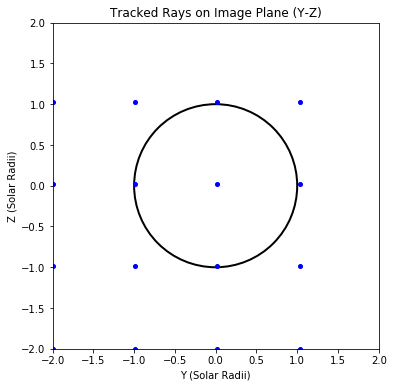

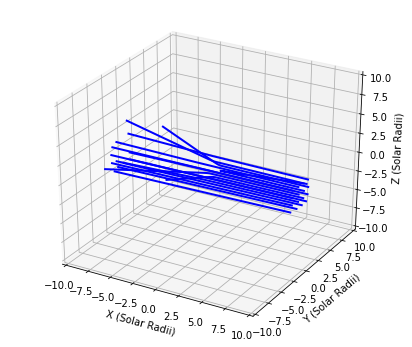

In [13]:
# Solar radii limits (Y and Z)
ymin, ymax = -2.0, 2.0
zmin, zmax = -2.0, 2.0

# Y and Z coordinates
y = np.linspace(ymin, ymax, nx)
z = np.linspace(zmin, zmax, ny)


# ---------------------------------------------------
# 2D IMAGE PLANE PLOT (Y-Z)
# ---------------------------------------------------
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


# Sun disk (radius = 1 solar radii)
sun = plt.Circle((0.0, 0.0), 1.0, fill=False, linewidth=2)
ax.add_patch(sun)

# mark tracked rays
for ray in trkrays:
    iy = ray[0]
    iz = ray[1]

    yr = y[iy]
    zr = z[iz]

    ax.plot(yr, zr, 'o', markersize=4, color='blue')

ax.set_xlim(ymin, ymax)
ax.set_ylim(zmin, zmax)
ax.set_aspect('equal')

ax.set_xlabel('Y (Solar Radii)')
ax.set_ylabel('Z (Solar Radii)')
ax.set_title('Tracked Rays on Image Plane (Y-Z)')

plt.show()

# ---------------------------------------------------
# 3D RAY TRAJECTORIES
# traj assumed shape = (Nrays, Nsteps, 3)
# traj[:,:,0] = X , traj[:,:,1] = Y , traj[:,:,2] = Z
# ---------------------------------------------------
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(traj.shape[0]):
    ax.plot(traj[i,:,0],   # X direction (propagation)
            traj[i,:,1],   # Y
            traj[i,:,2],   # Z
            linewidth=2,
            color='blue',
            label='Ray %d' % (i+1))

ax.set_xlabel('X (Solar Radii)')
ax.set_ylabel('Y (Solar Radii)')
ax.set_zlabel('Z (Solar Radii)')

# consistent limits
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)

# ax.legend()   # optional (can be heavy for many rays)

plt.show()
